Saved frequency sampling (1/2) to: D:\sem 6\DIP\L01 images\freq_sample_1_2.png
Saved spatial sampling   (1/2) to: D:\sem 6\DIP\L01 images\spatial_sample_1_2.png
Saved frequency sampling (1/4) to: D:\sem 6\DIP\L01 images\freq_sample_1_4.png
Saved spatial sampling   (1/4) to: D:\sem 6\DIP\L01 images\spatial_sample_1_4.png
Saved frequency sampling (1/8) to: D:\sem 6\DIP\L01 images\freq_sample_1_8.png
Saved spatial sampling   (1/8) to: D:\sem 6\DIP\L01 images\spatial_sample_1_8.png
Saved frequency sampling (1/16) to: D:\sem 6\DIP\L01 images\freq_sample_1_16.png
Saved spatial sampling   (1/16) to: D:\sem 6\DIP\L01 images\spatial_sample_1_16.png


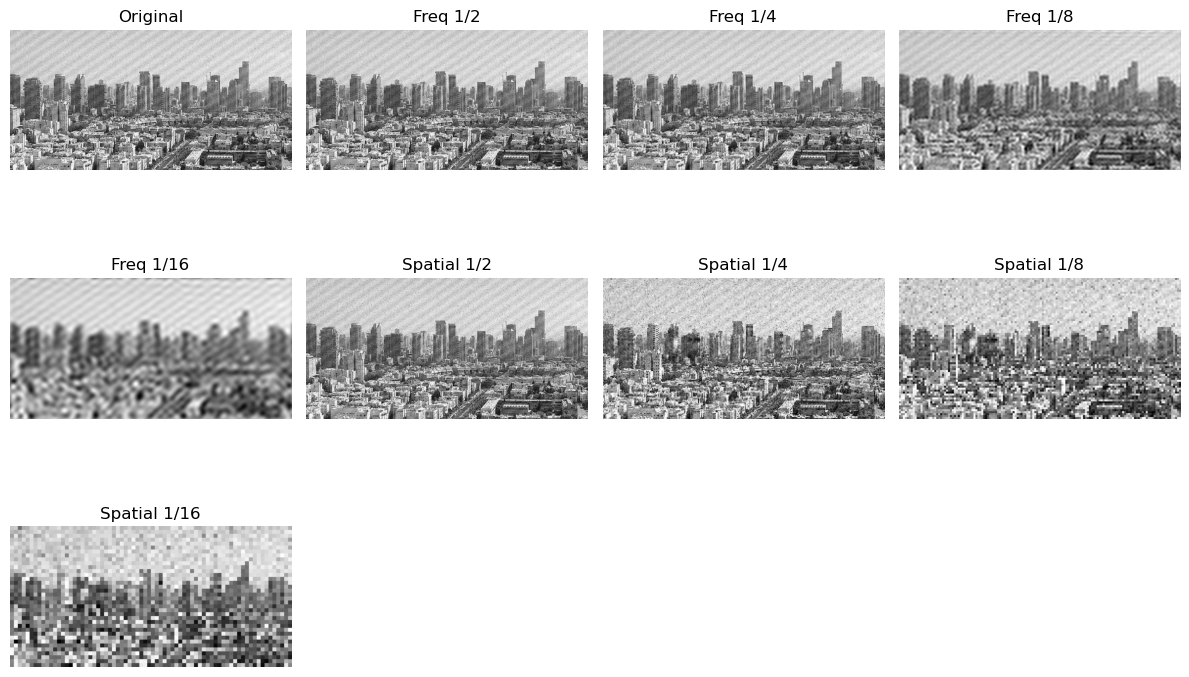

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# ----------------------------------------------------
# CONFIG: your image path (no need to change anything)
# ----------------------------------------------------
IMAGE_PATH = r"D:\sem 6\DIP\L01 images\Salt & Pepper Noise.png"

# output folder = same folder as input image
OUTPUT_DIR = os.path.dirname(IMAGE_PATH)

# ----------------------------------------------------
# LOAD IMAGE + CONVERT TO GRAYSCALE
# ----------------------------------------------------
img = Image.open(IMAGE_PATH).convert("L")  # grayscale
img_arr = np.array(img).astype(float)
H, W = img_arr.shape

# Sampling factors: 1/2, 1/4, 1/8, 1/16
factors = [2, 4, 8, 16]

# ----------------------------------------------------
# FREQUENCY SAMPLING FUNCTION
# ----------------------------------------------------
def frequency_sample(image, factor):
    # 2D FFT
    F = np.fft.fft2(image)
    F_shift = np.fft.fftshift(F)

    h, w = image.shape
    cy, cx = h // 2, w // 2  # center of spectrum

    # keep only central (1/factor) frequencies
    ry, rx = cy // factor, cx // factor

    mask = np.zeros_like(F_shift)
    mask[cy - ry: cy + ry, cx - rx: cx + rx] = 1

    F_sampled = F_shift * mask

    # inverse FFT
    F_ishift = np.fft.ifftshift(F_sampled)
    recon = np.fft.ifft2(F_ishift)
    recon = np.abs(recon)
    recon = np.clip(recon, 0, 255)
    return recon

# ----------------------------------------------------
# SPATIAL SAMPLING FUNCTION
# ----------------------------------------------------
def spatial_sample(image, factor):
    # take every factor-th pixel
    sampled = image[::factor, ::factor]

    # resize back to original for display
    small_img = Image.fromarray(sampled.astype(np.uint8))
    resized = small_img.resize((W, H), Image.NEAREST)
    return np.array(resized)

# ----------------------------------------------------
# APPLY SAMPLING
# ----------------------------------------------------
freq_images = []
spatial_images = []

for f in factors:
    # frequency sampling
    fs_img = frequency_sample(img_arr, f)
    freq_images.append(fs_img)

    # spatial sampling
    ss_img = spatial_sample(img_arr, f)
    spatial_images.append(ss_img)

    # save images
    fs_save = Image.fromarray(fs_img.astype(np.uint8))
    ss_save = Image.fromarray(ss_img.astype(np.uint8))

    fs_path = os.path.join(OUTPUT_DIR, f"freq_sample_1_{f}.png")
    ss_path = os.path.join(OUTPUT_DIR, f"spatial_sample_1_{f}.png")

    fs_save.save(fs_path)
    ss_save.save(ss_path)

    print(f"Saved frequency sampling (1/{f}) to:", fs_path)
    print(f"Saved spatial sampling   (1/{f}) to:", ss_path)

# ----------------------------------------------------
# DISPLAY RESULTS
# ----------------------------------------------------
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(3, 4, 1)
plt.imshow(img_arr, cmap='gray')
plt.title("Original")
plt.axis('off')

# Frequency sampling row
for i, f in enumerate(factors):
    plt.subplot(3, 4, i + 2)
    plt.imshow(freq_images[i], cmap='gray')
    plt.title(f"Freq 1/{f}")
    plt.axis('off')

# Spatial sampling row
for i, f in enumerate(factors):
    plt.subplot(3, 4, i + 6)
    plt.imshow(spatial_images[i], cmap='gray')
    plt.title(f"Spatial 1/{f}")
    plt.axis('off')

plt.tight_layout()
plt.show()
